In [3]:
import torch 


In [4]:
t = torch.tensor([1.0,2.0,3.0],requires_grad=True)

tensor_sum = t.sum()
tensor_sum.backward()


In [5]:
t.grad

tensor([1., 1., 1.])

In [6]:
import torch 
tensor = torch.tensor([1.0,2.0,3.0],requires_grad=True)
tensor.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [13]:
import torch 
from sklearn import preprocessing 

torch_features = torch.tensor([[-100.1,3240.1],
                               [-200.2,-234.1],[5000.5,150.1],
                               [6000.6,-125.1],
                               [9000.9,-673.1]],
                               requires_grad=True)
mean = torch_features.mean(0,keepdim=True)
print(f"before mean: {mean}")
standard_deviation = torch_features.std(0,unbiased=False,keepdim=True)
print(f"before std: {standard_deviation}")
torch_features_standardized = torch_features - mean 
torch_features_standardized /= standard_deviation
print(torch_features_standardized)
print(f"mean after {torch_features_standardized.mean(0,keepdim=True)}") 
print(f"standard deviation after: {torch_features_standardized.std(0,unbiased=True,keepdim=True)}")





before mean: tensor([[3940.3403,  471.5800]], grad_fn=<MeanBackward1>)
before std: tensor([[3590.1841, 1409.4224]], grad_fn=<StdBackward0>)
tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], grad_fn=<DivBackward0>)
mean after tensor([[-9.5367e-08,  5.9605e-09]], grad_fn=<MeanBackward1>)
standard deviation after: tensor([[1.1180, 1.1180]], grad_fn=<StdBackward0>)


In [14]:
import torch 
import torch.nn as nn 

class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.fc1 = nn.Linear(10,16)
    self.fc2 = nn.Linear(16,16)
    self.fc3 = nn.Linear(16,1)

  def forward(self,x):
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = nn.functional.sigmoid(self.fc3(x))

    return x 
  
network = SimpleNeuralNet()
loss_criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(network.parameters())
  

In [15]:
network

SimpleNeuralNet(
  (fc1): Linear(in_features=10, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [25]:
import torch 

class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,1),
      torch.nn.ReLU(),
      torch.nn.Linear(1,1),
      torch.nn.Sigmoid()
    )

  def forward(self,x):
    x = self.sequential(x)
    return x 
  

In [26]:
SimpleNeuralNet()

SimpleNeuralNet(
  (sequential): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
# training a binary classifer 

import torch 
import torch.nn as nn 
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset 
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 

feature,target = make_classification(n_classes=2,n_features=10,n_samples=100)
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size=0.1,random_state=1)

torch.manual_seed(0)
np.random.seed(0)

x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,1),
      torch.nn.Sigmoid()


    )

  def forward(self,x):
    x = self.sequential(x)
    return x 
  

network = SimpleNeuralNet()
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

network = torch.compile(network)


epochs = 3 

for epoch in range(epochs):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

  print("Epoch: ",epoch+1, "\tLoss: ",loss.item() )


with torch.no_grad():
  output = network(x_test)
  test_loss = criterion(output,y_test)
  test_accuracy = (output.round()==y_test).float().mean()
  print("Test loss: ",test_loss.item(),"\t Test accuracy: ",test_accuracy.item())

Epoch:  1 	Loss:  0.6957518458366394
Epoch:  2 	Loss:  0.5845347046852112
Epoch:  3 	Loss:  0.4021395444869995
Test loss:  0.3768031895160675 	 Test accuracy:  0.800000011920929


In [ ]:
from torch.utils.data import DataLoader, TensorDataset 
train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
for epoch in range(epochs):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

In [9]:
import torch 
import torch.nn as nn 
from sklearn.model_selection import train_test_split 
import numpy as np 
from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset 



features,target = make_classification(n_classes=2,n_features=10,n_samples=500)


features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=42)

features_train = torch.from_numpy(features_train).float()
features_test = torch.from_numpy(features_test).float()

target_train = torch.from_numpy(target_train).float().view(-1,1)
target_test = torch.from_numpy(target_test).float().view(-1,1)

class MyneuralNet(nn.Module):

  def __init__(self):
    super(MyneuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10,15),
      torch.nn.ReLU(),
      torch.nn.Linear(15,15),
      torch.nn.ReLU(),
      torch.nn.Linear(15,1),
      torch.nn.Sigmoid()

    )

  def forward(self,x):
    x = self.sequential(x)
    return x 
  

network = MyneuralNet()
optimizer= torch.optim.RMSprop(params=network.parameters(),lr=0.001)
criterion = nn.BCELoss()

train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

epochs = 5 

for epoch in range(epochs):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()
    print("Epoch: ", epoch+1 , "\t Loss: ",loss.item(), "\t batch_idx : ",batch_idx)

with torch.no_grad():
  output=network(x_test)
  test_loss=criterion(output,y_test)
  test_accuracy = (output.round()==y_test).float().mean()
  print("test_accuracy: ", test_accuracy.item())

  




Epoch:  1 	 Loss:  0.6954081654548645 	 batch_idx :  0
Epoch:  2 	 Loss:  0.6817013621330261 	 batch_idx :  0
Epoch:  3 	 Loss:  0.6709926724433899 	 batch_idx :  0
Epoch:  4 	 Loss:  0.6602586507797241 	 batch_idx :  0
Epoch:  5 	 Loss:  0.649030864238739 	 batch_idx :  0
test_accuracy:  0.699999988079071


In [2]:
import torch 
import torch.nn as nn 
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset 
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 


In [ ]:
import torch 
import torch.nn as nn 
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset 
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 


n_classes = 3 
epochs = 3 

features,target = make_classification(n_classes=n_classes,n_informative=9,n_redundant=0,n_features=10,n_samples=1000)
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

x_train = torch.from_numpy(features_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(),num_classes=n_classes).float()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(),num_classes=n_classes).float()

class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,3),
      torch.nn.Softmax()
    )

  def forward(self,x):
    x = self.sequential(x)
    return x 
  
network = SimpleNeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())
train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)



for epoch in range(epochs):
  for batch_idx , (data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

    print("Epoch: ",epoch+1 , "\t Loss: ",loss.item())


with torch.no_grad():
  output = network(x_test)
  test_loss = criterion(output,y_test)
  test_accuracy = (output.round() == y_test).float().mean()
  print("test loss: ",test_loss.item(),"\t test accuracy: ",test_accuracy.item())



In [4]:
print(features)
print("*"*50)
print(target)

[[-2.15130774 -1.26278679  1.4626347  ...  1.11832947  3.64072982
   0.67834325]
 [-0.01063494  2.46283692  1.0334441  ... -1.45484852 -3.48131126
  -3.33728761]
 [ 2.16335878  1.3488019  -2.06684874 ... -0.01606104 -2.98943225
   2.39430027]
 ...
 [-2.93013553  1.6415236  -2.91823322 ... -1.2942512   0.53323463
  -1.52676451]
 [ 2.0473533  -0.72199788  1.96588715 ...  1.56130719  1.38219134
   1.92437472]
 [ 2.74826493  0.84448662  0.26363775 ...  0.47948839 -1.36695404
  -1.29623673]]
**************************************************
[1 2 0 1 1 0 2 2 0 2 2 1 2 0 2 1 2 1 1 2 0 0 0 0 2 2 2 0 2 2 1 0 1 0 0 2 1
 1 0 2 0 1 0 0 2 2 1 0 1 1 0 1 1 2 2 0 0 1 0 0 0 1 0 0 1 1 0 1 0 2 1 0 0 2
 0 0 1 2 1 2 2 1 0 0 1 1 1 1 1 2 1 1 0 1 2 1 1 2 2 1 0 2 1 1 2 2 2 1 2 1 2
 2 1 0 2 2 1 2 1 0 2 2 2 1 0 1 1 1 0 2 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 2 1 1
 2 0 0 1 1 1 0 0 1 0 1 2 0 0 2 0 1 0 0 2 2 2 0 2 0 0 2 2 1 2 2 0 1 1 2 2 2
 0 0 0 2 1 1 1 1 1 1 2 0 0 2 2 2 2 1 1 0 1 2 2 1 1 1 1 0 2 2 0 0 1 0 0 2 0
 1 2 0 

In [5]:
x_train = torch.from_numpy(features_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(),num_classes=n_classes).float()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(),num_classes=n_classes).float()

In [6]:
print(y_train)

tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])


In [9]:
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,3),
      torch.nn.Softmax()
    )

  def forward(self,x):
    x = self.sequential(x)
    return x 
  
network = SimpleNeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())
train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)



for epoch in range(epochs):
  for batch_idx , (data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

    print("Epoch: ",epoch+1 , "\t Loss: ",loss.item())


with torch.no_grad():
  output = network(x_test)
  test_loss = criterion(output,y_test)
  test_accuracy = (output.round() == y_test).float().mean()
  print("test loss: ",test_loss.item(),"\t test accuracy: ",test_accuracy.item())

Epoch:  1 	 Loss:  1.0885506868362427
Epoch:  1 	 Loss:  0.9872860908508301
Epoch:  1 	 Loss:  0.933033287525177
Epoch:  1 	 Loss:  0.923216700553894
Epoch:  1 	 Loss:  0.9166346788406372
Epoch:  1 	 Loss:  0.8142445087432861
Epoch:  1 	 Loss:  0.8534083366394043
Epoch:  1 	 Loss:  0.8164997100830078
Epoch:  1 	 Loss:  0.8026147484779358
Epoch:  2 	 Loss:  0.7912500500679016
Epoch:  2 	 Loss:  0.7450013756752014
Epoch:  2 	 Loss:  0.7581684589385986
Epoch:  2 	 Loss:  0.6974072456359863
Epoch:  2 	 Loss:  0.7892930507659912
Epoch:  2 	 Loss:  0.746651828289032
Epoch:  2 	 Loss:  0.8122899532318115
Epoch:  2 	 Loss:  0.7562440633773804
Epoch:  2 	 Loss:  0.7861574292182922
Epoch:  3 	 Loss:  0.7800007462501526
Epoch:  3 	 Loss:  0.6797574758529663
Epoch:  3 	 Loss:  0.690274178981781
Epoch:  3 	 Loss:  0.7337931990623474
Epoch:  3 	 Loss:  0.706205427646637
Epoch:  3 	 Loss:  0.6999812126159668
Epoch:  3 	 Loss:  0.685436487197876
Epoch:  3 	 Loss:  0.7644975185394287
Epoch:  3 	 Loss: 

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [4]:
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


epoch : 1 , batch: 0 loss: 0.7093110680580139 
epoch : 1 , batch: 1 loss: 0.6500900387763977 
epoch : 1 , batch: 2 loss: 0.4533092975616455 
epoch : 1 , batch: 3 loss: 0.2819755971431732 
epoch : 1 , batch: 4 loss: 0.14563243091106415 
epoch : 1 , batch: 5 loss: 0.16744908690452576 
epoch : 1 , batch: 6 loss: 0.2804996371269226 
epoch : 1 , batch: 7 loss: 0.1416817307472229 
epoch : 1 , batch: 8 loss: 0.19006995856761932 
epoch : 2 , batch: 0 loss: 0.1849408745765686 
epoch : 2 , batch: 1 loss: 0.14488480985164642 
epoch : 2 , batch: 2 loss: 0.11295611411333084 
epoch : 2 , batch: 3 loss: 0.07404299825429916 
epoch : 2 , batch: 4 loss: 0.09094160050153732 
epoch : 2 , batch: 5 loss: 0.0935373604297638 
epoch : 2 , batch: 6 loss: 0.19414213299751282 
epoch : 2 , batch: 7 loss: 0.15227925777435303 
epoch : 2 , batch: 8 loss: 0.14092367887496948 
epoch : 3 , batch: 0 loss: 0.09918724000453949 
epoch : 3 , batch: 1 loss: 0.21540036797523499 
epoch : 3 , batch: 2 loss: 0.11499441415071487 


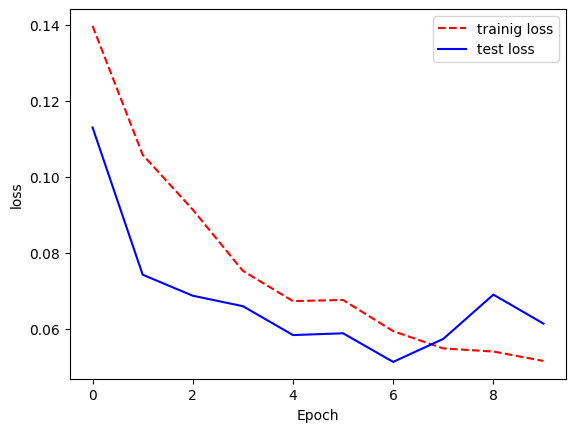

In [12]:
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
features,target = make_classification(n_classes=2,n_features=10,n_samples=1000)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

x_train = torch.from_numpy(features_train).float()
x_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train).float().view(-1,1)
y_test = torch.from_numpy(target_test).float().view(-1,1)

torch.manual_seed(0)
np.random.seed(0)

class Mysimplenet(nn.Module):
  def __init__(self):
    super(Mysimplenet,self).__init__()
    self.sequential = nn.Sequential(
      nn.Linear(10,16),
      nn.ReLU(),
      nn.Linear(16,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.Sigmoid(),
    )

  def forward(self,x):
    x= self.sequential(x)
    return x 
  
network = Mysimplenet()
criterion = nn.BCELoss()
optimizer = RMSprop(params=network.parameters())
epochs = 10 
dataset = TensorDataset(x_train,y_train)
loader = DataLoader(dataset,batch_size=100,shuffle=True)
train_losses = []
test_losses = []
for i in range(epochs):
  for batch_idx,(data,target) in enumerate(loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

    print(f"epoch : {i+1} , batch: {batch_idx} loss: {loss} ")


  with torch.no_grad():
    train_output = network(x_train)
    train_losses.append(criterion(train_output, y_train).item())
    test_output = network(x_test)
    test_losses.append(criterion(test_output,y_test).item())

epochs = range(0,epochs)
plt.plot(epochs,train_losses,"r--")
plt.plot(epochs,test_losses,"b-")
plt.legend(["trainig loss", "test loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()





epoch : 1 , batch: 0 loss: 0.7093110680580139 
epoch : 1 , batch: 1 loss: 0.7058876156806946 
epoch : 1 , batch: 2 loss: 0.7110633850097656 
epoch : 1 , batch: 3 loss: 0.7029604911804199 
epoch : 1 , batch: 4 loss: 0.6962843537330627 
epoch : 1 , batch: 5 loss: 0.7008009552955627 
epoch : 1 , batch: 6 loss: 0.694658637046814 
epoch : 1 , batch: 7 loss: 0.7011111378669739 
epoch : 1 , batch: 8 loss: 0.6982342600822449 
epoch : 2 , batch: 0 loss: 0.6908770203590393 
epoch : 2 , batch: 1 loss: 0.6978381872177124 
epoch : 2 , batch: 2 loss: 0.7042335271835327 
epoch : 2 , batch: 3 loss: 0.6990953087806702 
epoch : 2 , batch: 4 loss: 0.7004163861274719 
epoch : 2 , batch: 5 loss: 0.7014570832252502 
epoch : 2 , batch: 6 loss: 0.6964471340179443 
epoch : 2 , batch: 7 loss: 0.6938332915306091 
epoch : 2 , batch: 8 loss: 0.6941671967506409 
epoch : 3 , batch: 0 loss: 0.705101728439331 
epoch : 3 , batch: 1 loss: 0.6947309970855713 
epoch : 3 , batch: 2 loss: 0.6999576091766357 
epoch : 3 , bat

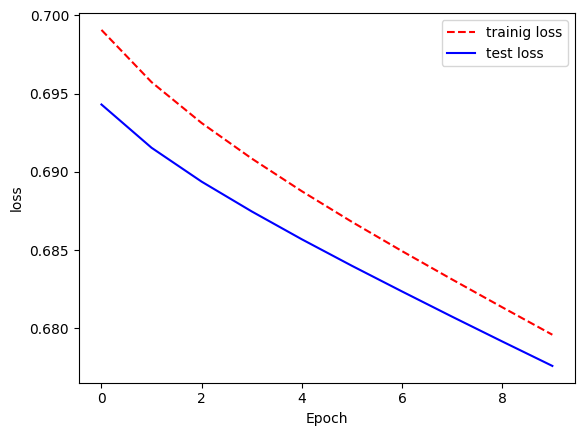

In [13]:

import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
features,target = make_classification(n_classes=2,n_features=10,n_samples=1000)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

x_train = torch.from_numpy(features_train).float()
x_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train).float().view(-1,1)
y_test = torch.from_numpy(target_test).float().view(-1,1)

torch.manual_seed(0)
np.random.seed(0)

class Mysimplenet(nn.Module):
  def __init__(self):
    super(Mysimplenet,self).__init__()
    self.sequential = nn.Sequential(
      nn.Linear(10,16),
      nn.ReLU(),
      nn.Linear(16,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.Sigmoid(),
    )

  def forward(self,x):
    x= self.sequential(x)
    return x 
  
network = Mysimplenet()
criterion = nn.BCELoss()
optimizer = RMSprop(params=network.parameters(),lr=1e-4,weight_decay=1e-5)
epochs = 10 
dataset = TensorDataset(x_train,y_train)
loader = DataLoader(dataset,batch_size=100,shuffle=True)
train_losses = []
test_losses = []
for i in range(epochs):
  for batch_idx,(data,target) in enumerate(loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

    print(f"epoch : {i+1} , batch: {batch_idx} loss: {loss} ")


  with torch.no_grad():
    train_output = network(x_train)
    train_losses.append(criterion(train_output, y_train).item())
    test_output = network(x_test)
    test_losses.append(criterion(test_output,y_test).item())

epochs = range(0,epochs)
plt.plot(epochs,train_losses,"r--")
plt.plot(epochs,test_losses,"b-")
plt.legend(["trainig loss", "test loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()





In [16]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import lightning as pl
from lightning.pytorch.callbacks import EarlyStopping

# ===============================
# Reproducibility
# ===============================
torch.manual_seed(0)
np.random.seed(0)

# ===============================
# Dataset
# ===============================
features, target = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    random_state=1
)

X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.1, random_state=1
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val   = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train, y_train)
val_ds   = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=100)

# ===============================
# Model (Pure PyTorch)
# ===============================
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

# ===============================
# LightningModule
# ===============================
class LightningBinaryClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = SimpleNet()
        self.criterion = nn.BCEWithLogitsLoss()

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = self.criterion(logits, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = self.criterion(logits, y)
        self.log("val_loss", loss, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

# ===============================
# Early Stopping Callback
# ===============================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    mode="min",
    verbose=True
)

# ===============================
# Trainer
# ===============================
trainer = pl.Trainer(
    max_epochs=1000,
    callbacks=[early_stop],
    log_every_n_steps=1
)

# ===============================
# Train
# ===============================
model = LightningBinaryClassifier()
trainer.fit(model, train_loader, val_loader)


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name      | Type              | Params | Mode  | FLOPs
----------------------------------------------------------------
0 | mode

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 9/9 [00:00<00:00, 10.15it/s, v_num=0, train_loss=0.694, val_loss=0.693]

Metric val_loss improved. New best score: 0.693


Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 92.25it/s, v_num=0, train_loss=0.671, val_loss=0.680] 

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.680


Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 138.80it/s, v_num=0, train_loss=0.662, val_loss=0.666]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.666


Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 140.44it/s, v_num=0, train_loss=0.638, val_loss=0.650]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 0.650


Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 142.09it/s, v_num=0, train_loss=0.648, val_loss=0.631]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 0.631


Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 140.03it/s, v_num=0, train_loss=0.606, val_loss=0.609]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.609


Epoch 6: 100%|██████████| 9/9 [00:00<00:00, 141.44it/s, v_num=0, train_loss=0.606, val_loss=0.583]

Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.583


Epoch 7: 100%|██████████| 9/9 [00:00<00:00, 135.93it/s, v_num=0, train_loss=0.569, val_loss=0.552]

Metric val_loss improved by 0.031 >= min_delta = 0.0. New best score: 0.552


Epoch 8: 100%|██████████| 9/9 [00:00<00:00, 91.77it/s, v_num=0, train_loss=0.518, val_loss=0.518] 

Metric val_loss improved by 0.034 >= min_delta = 0.0. New best score: 0.518


Epoch 9: 100%|██████████| 9/9 [00:00<00:00, 141.59it/s, v_num=0, train_loss=0.488, val_loss=0.481]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.481


Epoch 10: 100%|██████████| 9/9 [00:00<00:00, 140.99it/s, v_num=0, train_loss=0.545, val_loss=0.444]

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 0.444


Epoch 11: 100%|██████████| 9/9 [00:00<00:00, 136.26it/s, v_num=0, train_loss=0.445, val_loss=0.411]

Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 0.411


Epoch 12: 100%|██████████| 9/9 [00:00<00:00, 123.85it/s, v_num=0, train_loss=0.445, val_loss=0.381]

Metric val_loss improved by 0.030 >= min_delta = 0.0. New best score: 0.381


Epoch 13: 100%|██████████| 9/9 [00:00<00:00, 148.77it/s, v_num=0, train_loss=0.493, val_loss=0.354]

Metric val_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.354


Epoch 14: 100%|██████████| 9/9 [00:00<00:00, 143.46it/s, v_num=0, train_loss=0.339, val_loss=0.332]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 0.332


Epoch 15: 100%|██████████| 9/9 [00:00<00:00, 97.35it/s, v_num=0, train_loss=0.435, val_loss=0.314] 

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 0.314


Epoch 16: 100%|██████████| 9/9 [00:00<00:00, 148.92it/s, v_num=0, train_loss=0.414, val_loss=0.300]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.300


Epoch 17: 100%|██████████| 9/9 [00:00<00:00, 146.14it/s, v_num=0, train_loss=0.377, val_loss=0.288]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.288


Epoch 18: 100%|██████████| 9/9 [00:00<00:00, 144.75it/s, v_num=0, train_loss=0.421, val_loss=0.278]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.278


Epoch 19: 100%|██████████| 9/9 [00:00<00:00, 141.25it/s, v_num=0, train_loss=0.395, val_loss=0.272]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.272


Epoch 20: 100%|██████████| 9/9 [00:00<00:00, 144.83it/s, v_num=0, train_loss=0.452, val_loss=0.266]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.266


Epoch 21: 100%|██████████| 9/9 [00:00<00:00, 139.11it/s, v_num=0, train_loss=0.383, val_loss=0.261]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.261


Epoch 22: 100%|██████████| 9/9 [00:00<00:00, 92.51it/s, v_num=0, train_loss=0.351, val_loss=0.257] 

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.257


Epoch 23: 100%|██████████| 9/9 [00:00<00:00, 140.24it/s, v_num=0, train_loss=0.394, val_loss=0.254]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.254


Epoch 24: 100%|██████████| 9/9 [00:00<00:00, 141.47it/s, v_num=0, train_loss=0.308, val_loss=0.252]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.252


Epoch 25: 100%|██████████| 9/9 [00:00<00:00, 138.65it/s, v_num=0, train_loss=0.416, val_loss=0.251]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.251


Epoch 26: 100%|██████████| 9/9 [00:00<00:00, 132.63it/s, v_num=0, train_loss=0.388, val_loss=0.248]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.248


Epoch 27: 100%|██████████| 9/9 [00:00<00:00, 134.53it/s, v_num=0, train_loss=0.302, val_loss=0.246]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.246


Epoch 28: 100%|██████████| 9/9 [00:00<00:00, 127.52it/s, v_num=0, train_loss=0.374, val_loss=0.245]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.245


Epoch 29: 100%|██████████| 9/9 [00:00<00:00, 87.30it/s, v_num=0, train_loss=0.326, val_loss=0.245] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.245


Epoch 30: 100%|██████████| 9/9 [00:00<00:00, 128.09it/s, v_num=0, train_loss=0.252, val_loss=0.243]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.243


Epoch 31: 100%|██████████| 9/9 [00:00<00:00, 144.93it/s, v_num=0, train_loss=0.278, val_loss=0.241]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.241


Epoch 32: 100%|██████████| 9/9 [00:00<00:00, 137.12it/s, v_num=0, train_loss=0.290, val_loss=0.241]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.241


Epoch 35: 100%|██████████| 9/9 [00:00<00:00, 154.45it/s, v_num=0, train_loss=0.452, val_loss=0.239]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.239


Epoch 36: 100%|██████████| 9/9 [00:00<00:00, 141.06it/s, v_num=0, train_loss=0.330, val_loss=0.239]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.239


Epoch 38: 100%|██████████| 9/9 [00:00<00:00, 102.07it/s, v_num=0, train_loss=0.368, val_loss=0.238]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.238


Epoch 39: 100%|██████████| 9/9 [00:00<00:00, 143.61it/s, v_num=0, train_loss=0.274, val_loss=0.237]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.237


Epoch 42: 100%|██████████| 9/9 [00:00<00:00, 153.20it/s, v_num=0, train_loss=0.283, val_loss=0.237]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.237. Signaling Trainer to stop.


Epoch 42: 100%|██████████| 9/9 [00:00<00:00, 138.28it/s, v_num=0, train_loss=0.283, val_loss=0.237]
